# Data Science and Business Analytics 

# Lets Grow More Dec 22 

# Task2 (1) Prediction using Decision Tree Algorithm

In [42]:
# Importing the libaries
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
#load the dataset
df=pd.read_csv("C:/Users/user/Downloads/Iris (3).csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Exploring Data

In [7]:
# To find the row of column 
df.shape

(150, 6)

In [121]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [122]:
#droping the column
df.drop(["Id"],axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [123]:
#To find the information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [119]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
#How many data points for each class are present
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [15]:
#Checking the null values
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# visualizations 

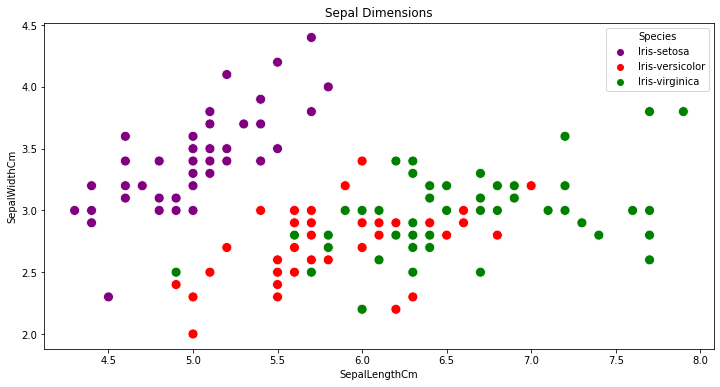

In [26]:
plt.figure(figsize=(12,6))
plt.title('Sepal Dimensions')

sb.scatterplot(x=df["SepalLengthCm"],y=df["SepalWidthCm"],hue=df["Species"],palette=["purple","red","green"],s=100);



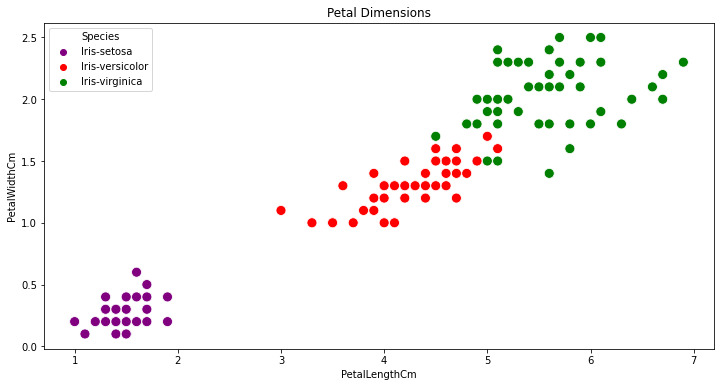

In [47]:
plt.figure(figsize=(12,6))
plt.title('Petal Dimensions')

sb.scatterplot(x=df["PetalLengthCm"],y=df["PetalWidthCm"],hue=df["Species"],palette=["purple","red","green"],s=100);

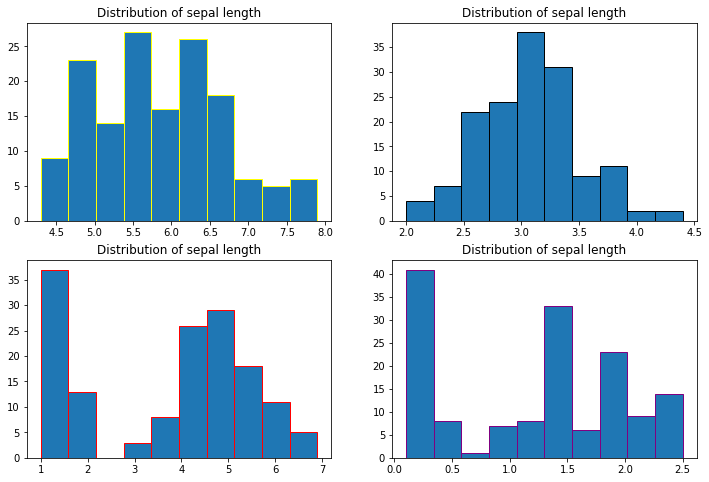

In [36]:
fig, axes = plt.subplots(2,2,figsize=(12,8))
#plot for sepal length
axes[0,0].set_title('Distribution of sepal length')
axes[0,0].hist(df["SepalLengthCm"],edgecolor="yellow");

#plot for sepal width
axes[0,1].set_title('Distribution of sepal length')
axes[0,1].hist(df["SepalWidthCm"],edgecolor="black");

#plot for petal length
axes[1,0].set_title('Distribution of sepal length')
axes[1,0].hist(df["PetalLengthCm"],edgecolor="red");

#plot for petal width
axes[1,1].set_title('Distribution of sepal length')
axes[1,1].hist(df["PetalWidthCm"],edgecolor="purple");

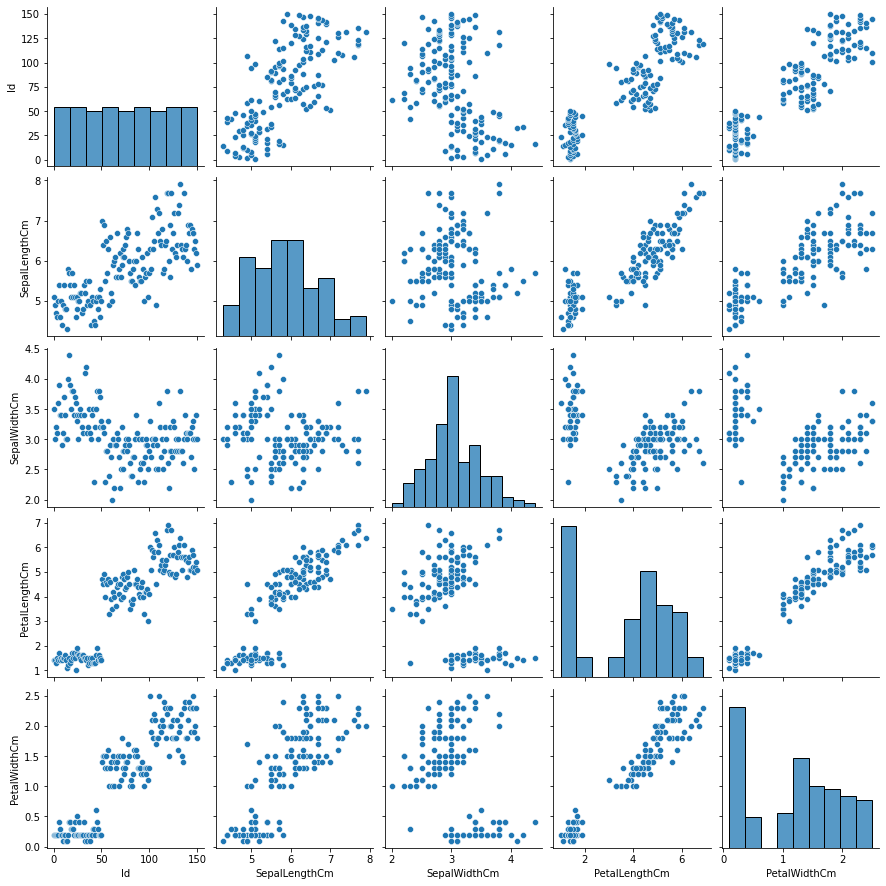

In [43]:
sns.pairplot(df)
plt.show()

# Correlation Analysis Between Feature abd Target

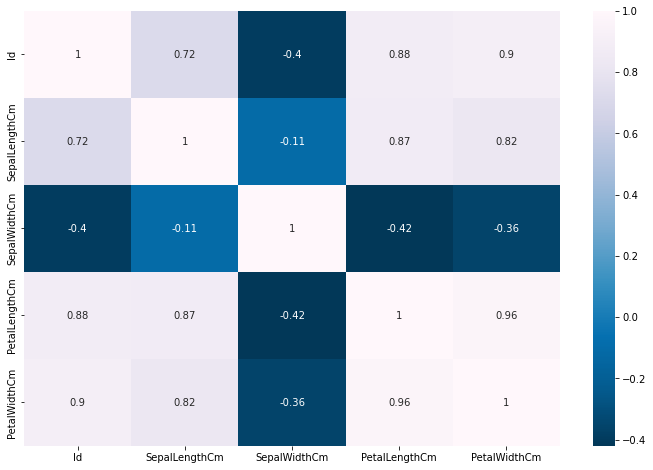

In [84]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='PuBu_r');

In [67]:
#spliting data
X=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
Y=df[["Species"]]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
print("successfully split the data")

successfully split the data


# Decision Tree Algorithm

In [73]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [75]:
#create model object
dtree= DecisionTreeClassifier(max_depth = 5, random_state = 0)
# Train the model on the data
dtree=dtree.fit(X_train, Y_train)
#predicting the score
dtree.score(X_train, Y_train)
# Predict labels of unseen (test) data
y_pred=dtree.predict(X_test)

# Metric Evaluation

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, predictions)
print(cm)



[[16  0  0]
 [ 0 17  0]
 [ 0  0 12]]


<AxesSubplot:>

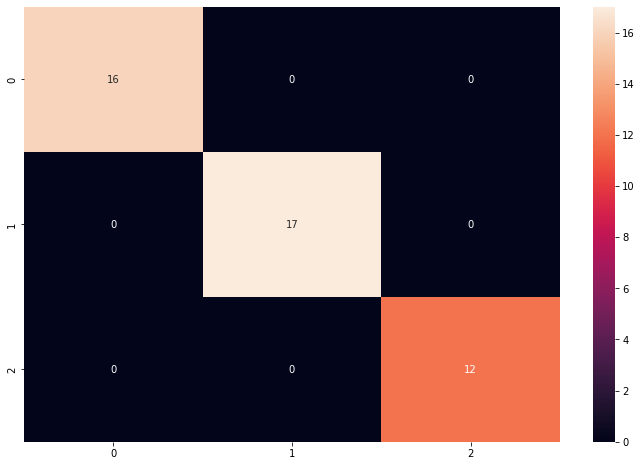

In [86]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_pred, predictions),annot=True)

# Visualize Decision Tree

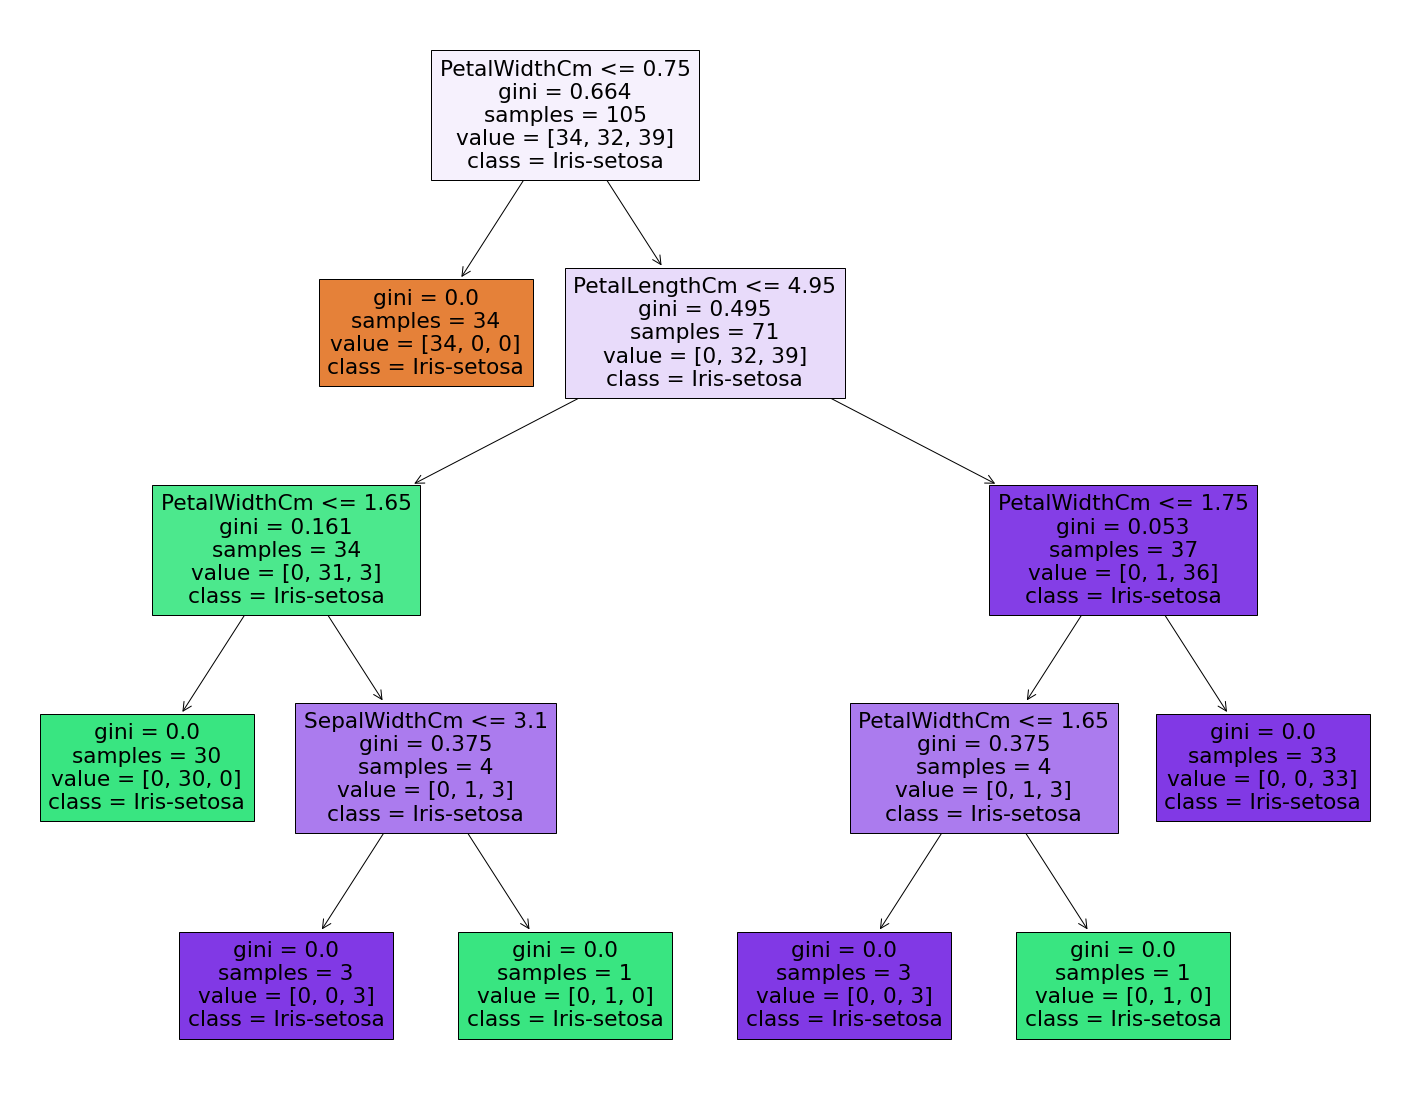

In [107]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
decision_tree1 = tree.plot_tree(clf, 
                   feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                   class_names=df.Species,
                   filled=True)

In [104]:
predictions = y_pred=dtree.predict(X_test)
print("The accuracy of Decision Tree is:",metrics.accuracy_score(predictions,Y_test))


The accuracy of Decision Tree is: 0.9777777777777777


#### The classifier model can predict the species with 97% of accuracy.

# Thank You !!